# Text Classification

### The Project is Divided into 6 parts :
- Loading the Dataset
- Creating Vocabulary
    - In this step we will remove stopwords and useless words and create a value count dictionary for all important words.
- Choosing top 'K' words.
- Tranforming text documents into 2D DataFrame, with column headers being top 'K' words.
- Recreating MultinomialNB classifier and analyzing the score
- Using Inbuilt MultinomialNB Classifier to anaylize result

### Note :
1. The dataset is already present in sklearn, so I am not downloading it through link.
2. **Some of the functions may take a very long time to execute**, as the input data is very large
3. While choosing the 'K' in top words, higher the 'K', higher the accuracy. As higher the number of fields higher the accuracy.


1. For my own implementation of NB classifier Predict Function, I will be passing the document as it is. 
2. I have not tranformed the x_test, But for Inbuilt classifier we have to transform both x_train and x_test.

### Also Read the conclusion at the end.

### Importing Libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from string import punctuation
import time
from nltk.tokenize import word_tokenize
from collections import OrderedDict
import math
from math import e, pi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 1. Loading and Splitting Dataset

#### Loading

In [2]:
news_groups = datasets.fetch_20newsgroups()
x = news_groups.data
y = news_groups.target

#### Splitting

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

### 2. Cleaning and Creating Vocabulary

#### Cleaning

In [4]:
## creating stopwords
stopwords_list = list(stopwords.words('english'))

## Downloaded some more stopwords from internet
with open('stopwords_list_extra.txt') as file :
    extra_stopwords = file.readlines()
    
## Since each word has '\n' character in end, I am getting rid of that
for index in range(len(extra_stopwords)) :
    extra_word = extra_stopwords[index]
    ## getting rod of '\n' last character
    extra_word = extra_word[: -1]
    extra_stopwords[index] = extra_word
    
## Adding the extra words into stopwords list
stopwords_list.extend(extra_stopwords)

## some words might have become repeated after adding them, so taking out unique set only
stopwords_list = list(set(stopwords_list))

## creating punctuation list
punctuation_list = list(punctuation)

## creating numbers list
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#### Creating vocabulary

In [5]:
def create_vocabulary(documents, stopwords_list, punctuation_list, numbers) :
    ## creating vocabulary dictionary
    vocabulary = dict()
    
    ## traversing all the documnets
    for doc in documents :
        ## splitting each documnet into list of words
        doc = doc.split()
        ## traversing all the words in that doc
        for word in doc :
            ## We will add lower_case words for example 'GAME' will be treated same as 'game'.
            word = word.lower().strip()
            ## we will only add those words which are not in stopwords list and whose length is greater than 3
            if (word not in stopwords_list) and (len(word) >= 3) :
                ## for each word, we will check, wether the word has any number or punctuation mark present in it.
                ## flag variable
                number_found = False
                ## traversing all numbers from number list, and even if one 'n' is present we will discard the word.
                for n in numbers :
                    if n in word :
                        number_found = True
                        break
                ## flag variable
                punc_found = False
                ## traversing all punctuation marks from punctuation list, and even if one 'n' is present, we discard the word.
                for punc in punctuation_list :
                    if punc in word :
                        punc_found = True
                        break
                ## checking if word was number free and punctuation free.
                if (not number_found) and (not punc_found) :
                    ## Adding the important word to dictionary
                    flag = vocabulary.get(word)
                    if not flag :
                        vocabulary[word] = 1
                    else :
                        vocabulary[word] += 1
                        
    ## Sorting the dictionary by Values                    
    keys = list(vocabulary.keys())
    values = list(vocabulary.values())
    sorted_value_index = np.argsort(values)
    vocabulary = {keys[i]: values[i] for i in sorted_value_index}
    
    ## Reversing the sorted dictionary
    vocabulary = dict(OrderedDict(reversed(list(vocabulary.items()))))
    
    ## returning the dictionary
    return vocabulary

### 3. Choosing Top 'K' words

In [6]:
def plot_graph(vocabulary) :
    freq=np.array(list(vocabulary.values()))[: 3000]
    words=np.array(list(vocabulary.keys()))[: 3000]
    plt.figure(figsize=(20, 7))
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.plot(np.arange(len(freq)), freq)
    plt.xticks((np.arange(0, 3001, 50)), rotation = 45)
    plt.show()

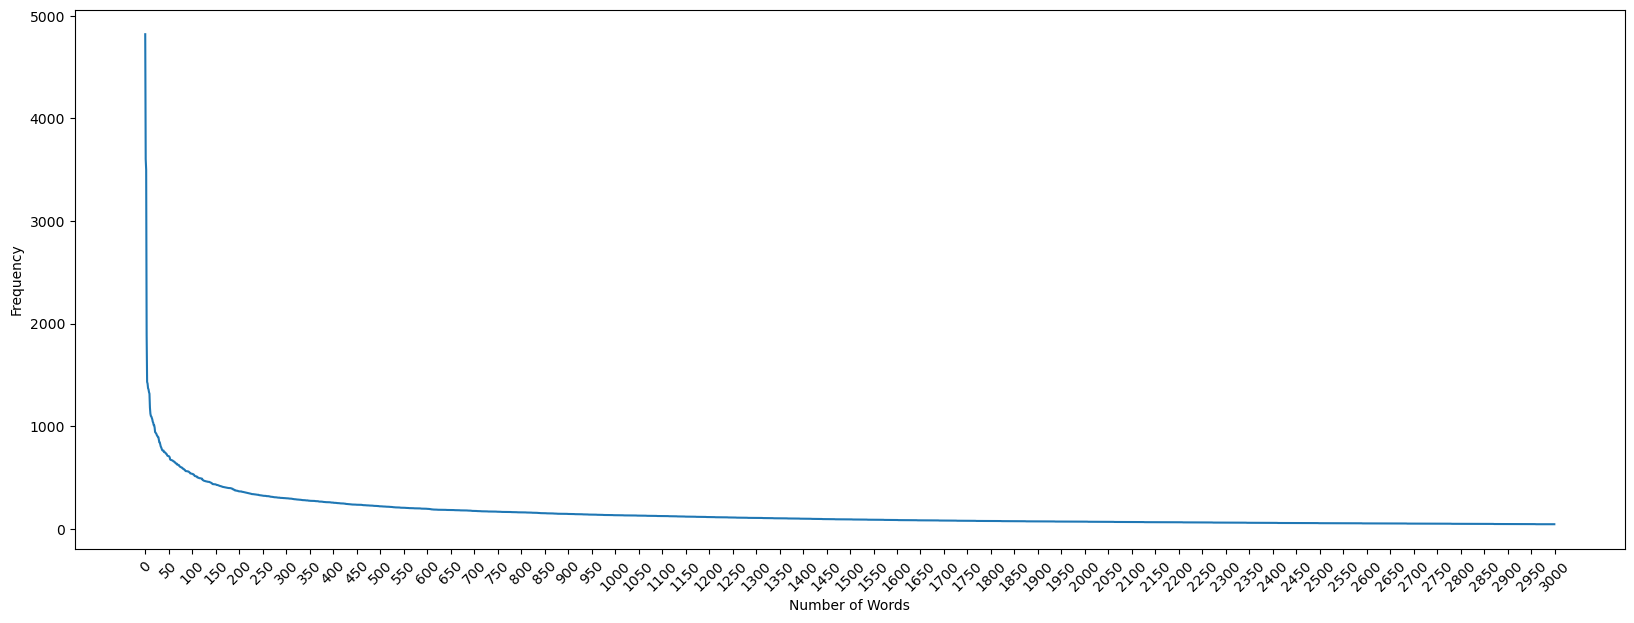

In [7]:
vocabulary = create_vocabulary(x_train, stopwords_list, punctuation_list, numbers)
plot_graph(vocabulary)

In [8]:
## From the above graph,i will be defining 'K' to be 2000
## the more the K, the higher the accuracy.
k = 20000

### 4. Transforming X_train Input to 2D DataFrame

In [9]:
def transform(documents, vocabulary) :
    ## creating list of dictionaries
    transformed_input = list()
    for doc in documents :
        ## dictionary which stores vocabulry : frequency for each documnent
        freq_count = dict()
        ## For each document we will traverse the vocabulary list, and for each word in vocabulary we will create its dict.
        for voc in vocabulary :
            ## if voc not present in the document then making its frequency 0
            if voc not in doc.split() :
                freq_count[voc] = 0
            ## else we will count how many times that voc word came into the doc
            else :
                count = 0
                for word in doc.split() :
                    if word == voc :
                        count += 1
                freq_count[voc] = count
        ## appending this dictionary for 1 document into a list
        transformed_input.append(freq_count)
    ## creating a dataframe from this list of dictionaries    
    transformed_input = pd.DataFrame.from_records(transformed_input)
    ## returning dataframe
    return transformed_input

In [10]:
## Passing Top 'K' words
vocabulary = list(vocabulary.keys())[: k]
x_train_transformed = transform(x_train, vocabulary)

In [11]:
x_train_transformed

article  people  university  time  world  system  computer  using  \
0           0       0           0     0      0       0         0      0   
1           0      10           0     4      3       1         0      1   
2           1       0           0     0      0       0         0      0   
3           0       0           0     0      0       0         0      0   
4           0       0           0     0      0       0         0      0   
...       ...     ...         ...   ...    ...     ...       ...    ...   
8480        0       0           0     0      1       0         0      0   
8481        3       0           0     0      0       0         0      0   
8482        0       0           0     0      0       0         0      0   
8483        1       0           0     0      0       0         0      0   
8484        2       1           0     0      1       0         0      0   

      believe  please  ...  indexing  quake  deletions  poseidon  stephane  \
0           0       0  ...         0      0          0         0         0   
1           0       1  ...         0      0          0         0         0   
2           0       0  ...         0      0          0         0         0   
3           0       0  ...         0      0          0         0         0   
4           0       0  ...         0      0          0         0         0   
...       ...     ...  ...       ...    ...        ...       ...       ...   
8480        0       0  ...         0      0          0         0         0   
8481        0       0  ...         0      0          0         0         0   
8482        0       0  ...         0      0          0         0         0   
8483        0       0  ...         0      0          0         0         0   
8484        0       0  ...         0      0          0         0         0   

      hunched  raced  ppmquant  abominations  pnw  
0           0      0         0             0    0  
1           0      0         0             0    0  
2           0      0         0             0    0  
3           0      0         0             0    0  
4           0      0         0             0    0  
...       ...    ...       ...           ...  ...  
8480        0      0         0             0    0  
8481        0      0         0             0    0  
8482        0      0         0             0    0  
8483        0      0         0             0    0  
8484        0      0         0             0    0  

[8485 rows x 20000 columns]

### 5. Recreating MultinomialNB Classifier

In [12]:
class NaiveBayesTextClassifier :
    def __init__(self) :
        ## This model stores the dictionary which is created during the training.
        self.model = None
        ## This is the list of all the feature words.
        self.vocabulary = list()
        ## This is the length of the vocabulary list.
        self.vocabulary_size = len(self.vocabulary)
    
    ## this function is made to print the model dictionary after the model is trained.
    def print_dict_model(self) :
        model = self.model
        if not (self.model) :
            print('Model Not Trained !!!')
            return
        for y in self.model :
            print(y, end = ' : ')
            for feature in model[y] :
                print(feature, ':' ,model[y][feature])
            print()

## ----------------------------------------------------- TRAINING ---------------------------------------------------    
    
    ## This is the training function.
    def fit(self, x_train, y_train) :
        ## storing the feature words
        self.vocabulary = x_train.columns
        ## Since the input x_train is a dataframe, we will be directly adding the Y column.
        x_train['Y'] = y_train
        ## making a copy of dataframe for handling subset queries.
        df = x_train.copy()
        ## this is the model dictionary which is goin to be created.
        model = dict()
        ## the model dictionary will contain the target as keys.
        for y in set(y_train) :
            ## Each key will store another dictionary which will store the count of each column in the subset w.r.t Y
            model[y] = dict()
            ## making subset.
            sub_df = df[df['Y'] == y]
            ## Storing Counts
            total = 0
            for feature in x_train.columns[: -1] : ## the [: -1] indicates that we will stop before the 'Y' column.
                model[y][feature] = sub_df[feature].sum()
                total += sub_df[feature].sum()
            model[y]['total_yi'] = total
        ## storing the dictionary inside the attribute for future use.
        self.model = model

## ---------------------------------------------------- TESTING ------------------------------------------------
## The Idea of testing is to pass the document as text itself, and from the document we will create the list of all the words.
## which are present as feature words.

## Calculating Probability :
## P(word = w / y = class) = P(word = w / y = class) ** (frequency of the word present in x_test)

## That means we calculated the probabilities of each word w.r.t class in Training. 
## But in testing the impact of all those probabilities will be only made with help of frequencies of all those words in x_test
## If we do not consider the frequency in testing then all the words will return same probabilities and no classification will
## be done.

## we will multiply all the probabilities of words, even if they are repeated.

## Also we will be calculating the log probabilities.

    def log_probability(self, important_words, y) :
        ## For each word in this list we are calculating it's log probability and adding them.
        ## Note : these words are repeated that is how they are going to create an impact for classification.
        model = self.model
        ## Probability of class being yi
        prob = log(model[y]['total_yi']) - log(len(model))
        ## traversing each word.
        for word in important_words :
            ## for each word we are getting its count from the model dictionary, and calculating probability.
            prob += log(model[y][word] + 1) - log(model[y]['total_yi'] + self.vocabulary_size)
        return prob
    
    def predict_one(self, important_words) :
        ## here we will calculate the feature with maximum probability.
        ## this code is very simple which calculates max among given data points.
        max_class = None
        max_prob = -math.inf
        model = self.model
        for y in model :
            proba = self.log_probability(important_words, y)
            if proba > max_prob :
                max_prob = proba
                max_class = y
        return max_class
    
    ## function which is called to predict outputs
    def predict(self, x_test) :
        if not self.model :
            print('Model Not Trained !!!')
            return
        
        ## creating list of outputs
        y_pred = list()
        for doc in x_test :
            ## change doc into list of words which are present in vocabulary
            important_words = self.convert_doc_to_important_words(doc, self.vocabulary)
            ## passing new list of words.
            ans = self.predict_one(important_words)
            y_pred.append(ans)
        return y_pred
    
    def convert_doc_to_important_words(self, doc, vocabulary) :
        ## for a given text document, converting it into list of words which are feature words, and including even if they are
        ## repeated
        important_words = list()
        for word in doc.split() : ## splitting dictionary
            ## checking if word belongs to feature words.
            if word in vocabulary :
                important_words.append(word)
        ## returning new list of words.
        return important_words

In [13]:
## creating object of our class
clf = NaiveBayesTextClassifier()

#### Training

In [14]:
clf.fit(x_train_transformed, y_train)

#### Printing Model

In [15]:
clf.print_dict_model()

0 : article : 303
people : 347
university : 2
time : 106
world : 79
system : 94
computer : 4
using : 37
believe : 163
please : 22
god : 85
information : 7
file : 7
usa : 2
space : 7
read : 89
government : 18
data : 3
help : 22
little : 70
look : 40
probably : 44
program : 1
question : 65
available : 6
set : 41
power : 15
windows : 0
tell : 45
drive : 6
public : 13
try : 60
hard : 27
software : 1
run : 7
called : 32
thanks : 1
key : 3
research : 3
lot : 23
law : 43
call : 34
science : 35
support : 35
able : 34
send : 29
looking : 11
national : 3
real : 37
found : 34
trying : 51
access : 6
name : 34
team : 0
jesus : 0
bit : 25
list : 20
center : 1
systems : 16
mean : 76
seen : 34
actually : 51
heard : 26
window : 0
following : 24
line : 18
maybe : 12
car : 16
free : 59
getting : 30
reason : 58
message : 17
post : 38
version : 21
gun : 4
means : 47
day : 36
person : 66
makes : 61
game : 5
apr : 0
current : 13
start : 28
chip : 2
local : 9
card : 0
human : 69
based : 45
technology : 0
imag

fullest : 0
jennifer : 0
synchros : 0
bride : 0
cisc : 0
pertains : 0
accomplishing : 0
shrapnel : 0
reinventing : 2
shore : 0
farra : 0
instigated : 0
siegel : 0
feminism : 0
recipe : 0
activist : 0
polling : 0
dresser : 0
mans : 0
vivitar : 0
forums : 0
portrayed : 0
anonimity : 0
philosphy : 1
lightening : 0
diversion : 0
shades : 0
routh : 0
eventhough : 0
completes : 0
borrowing : 0
headquartered : 0
julian : 0
farjestad : 0
deducted : 0
clash : 0
whith : 0
tal : 0
aik : 0
astral : 0
exaggerated : 0
upward : 0
pedophilia : 0
loathe : 0
abyss : 0
occupies : 0
nikon : 0
coptic : 0
cronies : 0
unorthodox : 0
logan : 0
purports : 0
whereupon : 0
caution : 0
associations : 0
eminently : 0
fermentation : 0
retard : 0
vance : 0
shutter : 1
eastman : 0
unprecidented : 0
subversive : 0
priori : 0
aurae : 0
rubeae : 0
roseae : 0
unequal : 0
heres : 0
trobe : 0
thoughtful : 0
gentle : 0
impulses : 1
competitor : 0
unanimously : 0
relaxation : 0
ntfs : 0
wholeheartedly : 0
adept : 0
clunie : 

institutional : 0
insistence : 0
copenhagen : 0
pocklington : 0
kravchuk : 0
cheering : 0
thy : 0
begs : 0
privileges : 0
enzyme : 0
oxalate : 0
kou : 0
recomend : 0
ridiculously : 1
withhold : 0
psychiatric : 0
uncontrolled : 0
acura : 0
slash : 0
nominate : 0
additionally : 0
builders : 0
feustel : 0
equalizer : 0
flockhart : 0
propp : 0
fedyk : 0
honorable : 0
kron : 0
occurring : 0
complying : 0
comrade : 0
fooling : 0
sunny : 0
awhile : 0
miraculous : 1
deuteronomy : 0
coincidence : 0
duc : 0
coins : 0
fiber : 0
redistribution : 0
waffle : 1
ecole : 0
prodrive : 1
endowed : 0
menlo : 0
collapsed : 0
neatly : 0
unjust : 0
sadik : 0
fuji : 0
preferences : 0
personalities : 0
alfred : 0
constructs : 0
supervisor : 0
criticized : 0
embarrassment : 0
mead : 0
lint : 0
aired : 0
aliens : 0
vetoed : 0
nets : 0
natonal : 0
unbelievers : 0
assessing : 0
destroys : 0
extinguished : 0
continent : 0
traders : 0
fighters : 0
padi : 0
lewisville : 0
pyron : 0
ref : 0
financially : 0
throne : 0


pocket : 0
corps : 0
organisation : 0
authentication : 3
mel : 0
ericsson : 0
damaging : 0
boss : 0
everytime : 0
ottomans : 0
soldier : 0
bloom : 0
laughing : 0
provision : 1
figuring : 0
transform : 2
determines : 4
rbis : 0
commonwealth : 0
preached : 0
foreground : 15
brave : 0
happily : 3
amino : 0
mandate : 2
treaty : 0
khan : 0
swing : 0
defeat : 0
liverpool : 0
infj : 0
chest : 0
policemen : 0
unarmed : 0
philly : 0
implicit : 3
drill : 0
dayton : 0
pentium : 0
temporarily : 4
internals : 1
neely : 0
slowing : 4
judaism : 0
tennis : 0
offended : 0
moslems : 0
cpsr : 0
demanding : 0
finance : 0
ronald : 0
overly : 0
noring : 0
updating : 2
accelerators : 9
existance : 0
flights : 0
euros : 0
boundaries : 0
alien : 0
voters : 0
cor : 0
geophysical : 2
parameters : 2
wolves : 0
grad : 0
thick : 0
ctrl : 0
plo : 0
hips : 0
enters : 0
barlow : 0
violates : 0
unwilling : 0
iraq : 0
departments : 0
ladies : 0
minors : 0
shostack : 0
spooks : 0
housing : 0
endorsed : 2
cabin : 0
draggi

married : 1
awful : 2
wonderful : 3
dark : 1
occupied : 1
cursor : 0
schedule : 0
wearing : 1
parent : 2
blow : 9
literature : 1
vitamin : 0
passages : 1
alomar : 0
nra : 0
gospel : 0
components : 3
instruments : 0
appressian : 0
debate : 1
spare : 18
aside : 0
planet : 0
handguns : 0
protecting : 0
projects : 0
tiff : 0
income : 1
harder : 6
propaganda : 0
restrictions : 2
revealed : 0
pure : 0
bitmap : 0
transmission : 18
modify : 0
whereas : 5
republic : 0
amounts : 1
intergraph : 0
homosexuality : 0
stolen : 2
touch : 4
speeds : 10
seeking : 0
ethnic : 0
brings : 0
salvation : 0
eisa : 0
officers : 2
rushdie : 0
produces : 1
replacement : 7
henry : 0
vertical : 1
resurrection : 0
suffered : 1
battle : 1
custom : 0
band : 3
observations : 0
pope : 0
fool : 2
mamma : 0
motion : 3
firearm : 0
ought : 2
culture : 2
settings : 1
commonly : 7
fallacy : 0
france : 0
watched : 0
filled : 4
snow : 13
obfuscated : 0
speaker : 4
orthodox : 0
superior : 2
unique : 2
island : 0
brad : 0
contain

colour : 0
mere : 0
symbol : 0
pitch : 30
prophecy : 0
presumably : 0
votes : 2
hopkins : 0
acting : 0
senior : 0
titan : 0
firm : 0
importance : 4
digest : 0
comparing : 5
capabilities : 0
continuing : 0
adobe : 0
jan : 0
vehicles : 0
gravity : 0
promote : 1
gang : 0
blown : 8
static : 0
irq : 0
frequency : 1
networks : 1
allen : 0
trip : 4
outlet : 0
prohibit : 0
albert : 0
square : 0
sections : 0
witness : 0
strike : 17
archives : 1
cryptographic : 0
exhaust : 0
sky : 0
smart : 5
proud : 0
growth : 2
hitter : 44
supplied : 0
sensitive : 0
xvoid : 0
prince : 0
catalog : 1
manufacturer : 0
throwing : 6
norway : 0
silver : 0
approved : 0
liberties : 0
offense : 27
conversation : 0
sells : 0
rockets : 0
genesis : 0
combination : 1
jersey : 0
bat : 19
iisi : 0
cat : 0
arrived : 0
zealand : 0
boy : 2
refused : 3
extent : 4
massacre : 0
injury : 18
mario : 0
sometime : 4
codes : 0
legislation : 0
carries : 0
politics : 2
steel : 0
assertion : 0
wing : 0
assert : 0
libertarian : 0
jonathan 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Testing

In [16]:
y_pred_self = clf.predict(x_test)

#### Confusion Matrix and Accuracy Score For our own classifier

In [17]:
print("Classification Report")
print(classification_report(y_test, y_pred_self))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       117
           1       0.71      0.63      0.67       138
           2       0.60      0.70      0.65       142
           3       0.62      0.59      0.60       145
           4       0.58      0.68      0.62       157
           5       0.75      0.71      0.73       136
           6       0.47      0.81      0.59       137
           7       0.86      0.80      0.83       164
           8       0.83      0.83      0.83       155
           9       0.76      0.84      0.80       141
          10       0.93      0.82      0.87       136
          11       0.89      0.78      0.83       156
          12       0.85      0.69      0.76       144
          13       0.94      0.82      0.88       145
          14       0.97      0.71      0.82       152
          15       0.82      0.65      0.73       150
          16       0.89      0.80      0.84       150
     

In [18]:
print("Confusion Matrix")
cfm = confusion_matrix(y_test, y_pred_self)
print(cfm)

Confusion Matrix
[[ 99   0   0   0   0   0   0   0   1   2   0   1   0   0   0   3   0   1
    3   7]
 [  0  87  16   6   8  15   3   1   2   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   7 100   9   8   6  11   0   0   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   1  15  85  26   2  11   0   0   1   0   0   1   0   1   1   0   1
    0   0]
 [  0   2  10  14 106   2  14   2   1   1   0   1   4   0   0   0   0   0
    0   0]
 [  0  11  11   2   1  97   7   0   2   0   0   1   1   0   1   0   0   1
    0   1]
 [  2   1   1   6   5   1 111   1   3   0   0   0   4   1   0   0   0   1
    0   0]
 [  0   0   1   1   5   1   8 131   7   0   0   1   3   0   0   1   1   0
    2   2]
 [  0   0   1   1   4   1   4   6 129   0   1   1   0   1   0   1   1   2
    2   0]
 [  1   0   0   0   1   1   5   0   1 119   5   0   0   0   0   3   1   3
    1   0]
 [  0   0   1   0   0   0   1   0   2  15 111   0   1   0   0   0   0   2
    2   1]
 [  2   1   0   0   2   2   5   0   0   2   0 12

In [19]:
print("Accuracy Score")
print(accuracy_score(y_test, y_pred_self) * 100, "%", sep="")

Accuracy Score
73.98373983739837%


### 6. Using the Inbuilt Classifier

#### Loading Dataset

In [20]:
x = news_groups.data
y = news_groups.target

#### Creating Vocabulary and Transforming Input

In [21]:
vocabulary = create_vocabulary(x, stopwords_list, punctuation_list, numbers)
k = 20000
vocabulary = list(vocabulary.keys())[: k]
x_transformed = transform(x, vocabulary)

#### Splitting

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y)

#### Creating MultinomialNB object

In [23]:
clf = MultinomialNB()

#### Training

In [24]:
clf.fit(x_train, y_train)

MultinomialNB()

#### Testing

In [25]:
y_pred = clf.predict(x_test)

#### Confusion Matrix and Accuracy Score

In [26]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       115
           1       0.74      0.69      0.72       140
           2       0.74      0.58      0.65       169
           3       0.55      0.63      0.59       144
           4       0.56      0.53      0.55       144
           5       0.59      0.79      0.68       150
           6       0.77      0.56      0.65       149
           7       0.73      0.79      0.76       138
           8       0.75      0.80      0.78       130
           9       0.87      0.76      0.81       145
          10       0.90      0.86      0.88       166
          11       0.76      0.93      0.84       149
          12       0.83      0.70      0.76       150
          13       0.89      0.87      0.88       151
          14       0.87      0.80      0.84       155
          15       0.70      0.88      0.78       145
          16       0.73      0.75      0.74       125
     

In [27]:
print("Confusion Matrix")
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

Confusion Matrix
[[ 81   0   0   0   0   1   0   1   3   0   1   0   0   1   0  12   0   5
    6   4]
 [  1  97   6   3   2  22   1   0   1   0   0   3   0   0   1   1   0   1
    0   1]
 [  0   3  98  12   9  29   7   0   2   0   0   2   1   1   0   0   1   2
    2   0]
 [  0   6   7  91  25   6   1   1   0   0   0   2   1   0   2   0   0   1
    1   0]
 [  0   4  10  31  77   3   1   5   3   3   0   1   2   0   3   1   0   0
    0   0]
 [  0   6   7   5   2 119   0   1   2   0   0   5   0   0   0   1   0   2
    0   0]
 [  0   4   1  10  10   5  84   6   5   1   0   4   7   2   3   0   3   2
    1   1]
 [  0   1   1   3   0   1   3 109   5   1   0   1   2   0   3   1   4   1
    2   0]
 [  0   0   0   0   2   0   2  10 104   0   0   1   1   1   0   2   3   1
    3   0]
 [  4   3   0   1   0   0   2   2   4 110  10   1   1   1   1   1   1   3
    0   0]
 [  0   0   0   0   0   0   1   2   2  11 142   0   0   3   0   1   1   1
    1   1]
 [  0   1   0   0   0   4   0   0   0   0   0 13

In [28]:
print("Accuracy Score")
print(accuracy_score(y_test, y_pred) * 100, "%", sep="")

Accuracy Score
73.80699893955462%


### Conclusion

- The self made Classifier is working almost same as the Inbuilt Classifier, with Accuracies : 65.8% and 66.5% respectively. To improve these Accuracies, we can increase the value of 'K', That is, increase the number of features. But for Short Time purposes, I chose the value of 'K' to be 2000.

### Saving predicted values into a csv file

In [29]:
np.savetxt('Text-Classification-Y-Predict.csv', y_pred)

### SUBMITTED BY - PRATEEK SARNA